<center><h1 style="font-size:2em;color:#2467C0;font-family:Times New Roman">Tagesaufgaben Ausreißer</h1></center>

# Aufgabe 1



In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [31]:
df = pd.read_csv(r"ausreisser.csv")
df

,x,y
0,5.15,5.20
1,4.69,4.74
2,6.72,6.67
3,6.79,6.83
4,6.48,6.51
...,...,...
95,6.53,6.46
96,4.78,4.83
97,6.24,6.20
98,7.30,7.22


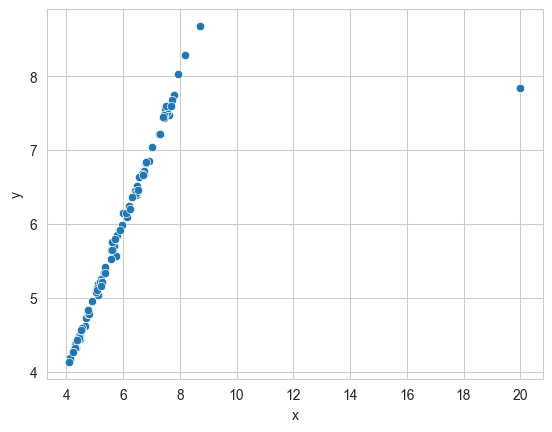

In [32]:
sns.scatterplot(df, x="x", y="y")
plt.show()

In [33]:
df.describe()

,x,y
count,100.000000,100.000000
mean,5.900700,5.792800
std,1.840643,1.174752
min,4.110000,4.130000
25%,4.760000,4.790000
50%,5.595000,5.605000
75%,6.705000,6.672500
max,20.000000,8.680000


In [34]:
X = df[["x"]]
y = df["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [35]:
model = LinearRegression()
model.fit(X_train.values, y_train)

LinearRegression()

In [36]:
train_min = X_train.min()
train_max = X_train.max()
predictions = model.predict([train_min, train_max])

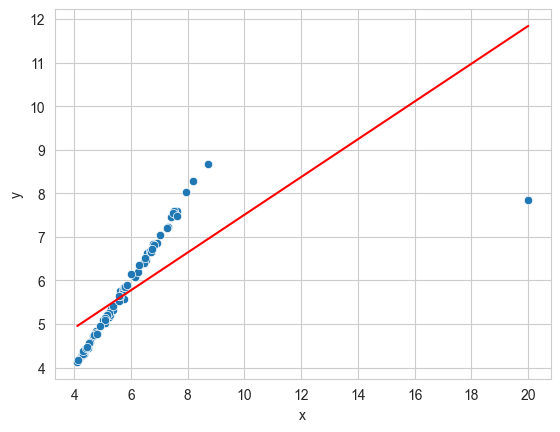

In [37]:
sns.scatterplot(x=X_train["x"], y=y_train)
plt.plot([X_train.min(), X_train.max()], predictions, color="red")
plt.show()

In [38]:
model.score(X_test.values, y_test)

0.6176887304527275

In [39]:
model.score(X_train.values, y_train)

0.5419286647470584

## Ausreißer entfernen und nochmal

In [40]:
df.sort_values("x", ascending=False)

,x,y
99,20.00,7.84
27,8.70,8.68
58,8.17,8.29
43,7.94,8.03
65,7.78,7.74
...,...,...
51,4.25,4.26
94,4.24,4.27
72,4.14,4.18
56,4.13,4.15


In [41]:
df_trimmed = df[df["x"] < 20]
df_trimmed

,x,y
0,5.15,5.20
1,4.69,4.74
2,6.72,6.67
3,6.79,6.83
4,6.48,6.51
...,...,...
94,4.24,4.27
95,6.53,6.46
96,4.78,4.83
97,6.24,6.20


In [42]:
X = df_trimmed[["x"]]
y = df_trimmed["y"]

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=1)

In [43]:
model = LinearRegression()
model.fit(X_train.values, y_train)

LinearRegression()

In [44]:
train_min = X_train.min()
train_max = X_train.max()
predictions = model.predict([train_min, train_max])

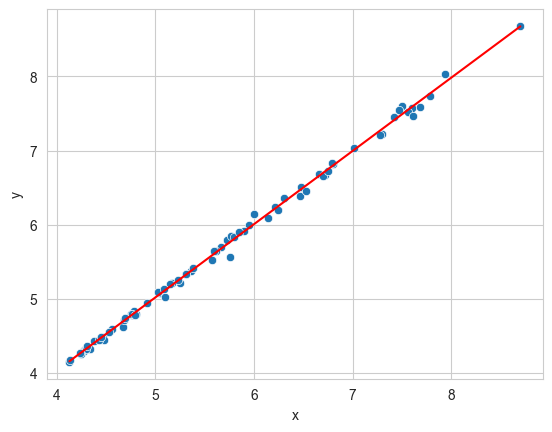

In [45]:
sns.scatterplot(x=X_train["x"], y=y_train)
plt.plot([X_train.min(), X_train.max()], predictions, color="red")
plt.show()

In [46]:
model.score(X_test.values, y_test)

0.9972313866495623

In [47]:
model.score(X_train.values, y_train)

0.9979676113974985